## `Follow along in this notebook to see the creation process of Figure 1: Species Diversity`

### `We will first import any packages needed`

In [19]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt

### `We can now load in and preview the data`

In [20]:
cfh = 'F:\\Research\\Funded\\UIREEJ\\Data\\Catch.pkl'
catch = pd.read_pickle(cfh)
# catch[['Fish', 'Site', '_Site', '_Species']].head(15)

### `Simplify `

In [21]:
catch['_Species'].replace("Common carp", "Carp", inplace=True) 
catch['_Species'].replace("Mirror Carp", "Carp", inplace=True)

### `Seperate up and down Stream`

In [22]:
down = catch.loc[catch['Site'].isin([1.0,3.0])]
down_df = down.groupby(down.loc[:,'_Species']).size()
down_df.name = 'down'
up = catch.loc[catch['Site'].isin([2.0,4.0])]
up_df = up.groupby(up.loc[:,'_Species']).size()
up_df.name = 'up'

### `Combine`

In [23]:
metadata = pd.merge(down_df, up_df, how='outer', left_index=True, right_index=True)
metadata.drop('Unknown', inplace=True)

### `UM COLORS`

In [24]:
maize = '#FFCB05'
blue = '#00274C'
umgrey = '#989C97'
rossorange = '#D86018'
tappanred = '#9A3324'
rackhamgreen = '#75988d'
wavefieldgreen = '#A5A508'

### `Add Niches`

In [25]:
niche_dict = {
    "Bigmouth Buffalo"    : "Planktivore",
    "Black bullhead"      : "Omnivore",
    "Black crappie"       : "Carnivore",
    "Bluegill"            : "Carnivore",
    "Bowfin"              : "Carnivore",
    "Brown bullhead"      : "Carnivore",
    "Carp"                : "Omnivore",
    "Channel catfish"     : "Omnivore",
    "Common Shinner"      : "Omnivore",
    "Emmerald Shinner"    : "Planktivore",
    "Freshwater drum"     : "Carnivore",
    "Gizzard shad"        : "Planktivore",
    "Goldfish"            : "Omnivore",
    "Green sunfish"       : "Carnivore",
    "Largemouth bass"     : "Carnivore",
    "Longnose Gar"        : "Piscivore",
    "Northern Logperch"   : "Planktivore",
    "Northern Pike"       : "Piscivore",
    "Pumpkinseed sunfish" : "Carnivore",
    "Quillback"           : "Omnivore",
    "Redhorse"            : "Planktivore",
    "Rock bass"           : "Carnivore",
    "Round goby"          : "Carnivore",
    "Smallmouth bass"     : "Carnivore",
    "Walleye"             : "Piscivore",
    "Warmouth"            : "Carnivore",
    "White Crappie"       : "Carnivore",
    "White Perch"         : "Piscivore",
    "White bass"          : "Piscivore",
    "White sucker"        : "Carnivore",
    "Yellow Bullhead"     : "Carnivore",
    "Yellow perch"        : "Carnivore",
}

metadata['Feeding'] = [niche_dict[x] for x in metadata.index]

color_dict = {
    "Carnivore" : maize,
    "Omnivore" : rossorange,
    "Piscivore" : tappanred,
    "Planktivore" : blue,
}

metadata['Color'] = metadata['Feeding'].apply(lambda x: color_dict[x])

### `Plot Formatting`

In [26]:
matplotlib.rcParams['font.family'] = 'calibri'
matplotlib.rcParams['axes.titlecolor'] = 'black'
matplotlib.rcParams['axes.titlesize'] = 43
matplotlib.rcParams['axes.titlepad'] = 15
matplotlib.rcParams['axes.labelcolor'] = 'black'
matplotlib.rcParams['axes.labelsize'] = 30
matplotlib.rcParams['axes.labelweight'] = 'bold'
matplotlib.rcParams['axes.labelpad'] = 25
matplotlib.rcParams['axes.xmargin'] = .75
matplotlib.rcParams['axes.ymargin'] = .025
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['axes.formatter.use_mathtext'] = True
matplotlib.rcParams['xtick.labelsize'] = 24
matplotlib.rcParams['ytick.labelsize'] = 24
matplotlib.rcParams['legend.fontsize'] = 24
matplotlib.rcParams['legend.labelspacing'] = 0.8
matplotlib.rcParams['legend.framealpha'] = 0
matplotlib.rcParams['text.usetex'] = True

### `Plot`

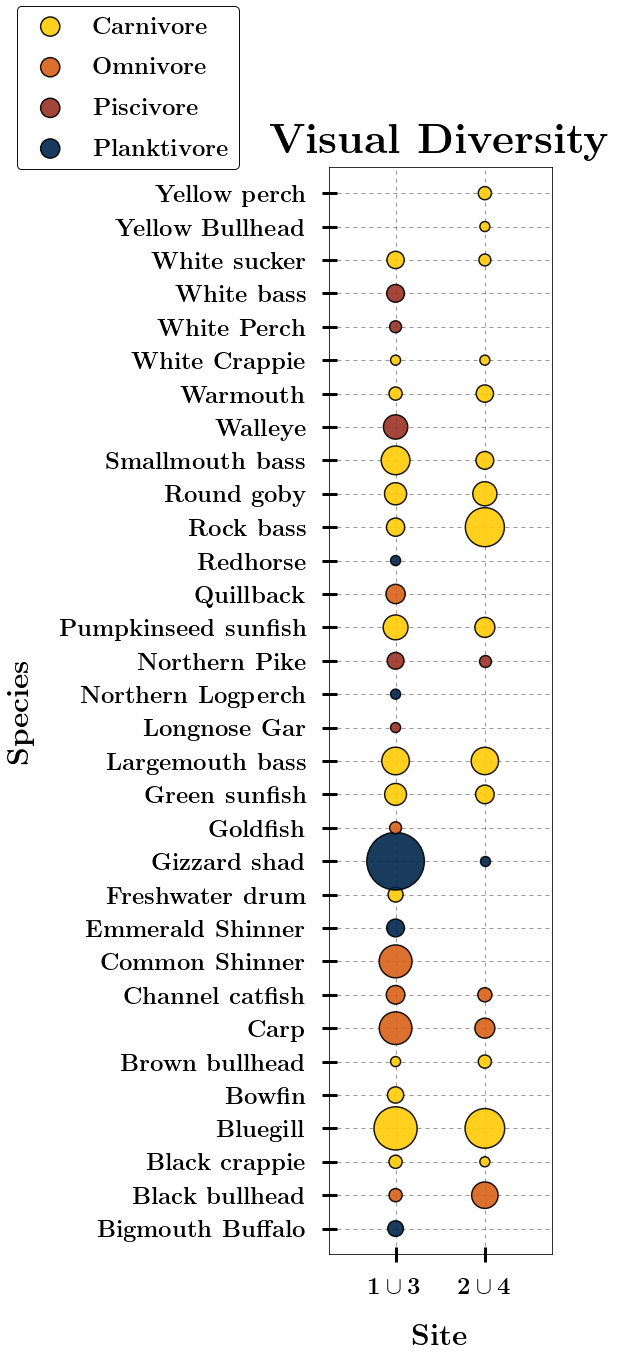

In [27]:
plt.tick_params(direction='inout',axis='both', pad=15, width=3, length=15, color='black')
plt.grid(dashes=[5, 5], animated=True, alpha=.5, c='black', zorder=3)
plt.xticks(rotation=0, ha='center')
plt.title(r'\textbf{Visual Diversity}', style='oblique')
plt.xlabel(r'\textbf{Site}', style='italic')
plt.ylabel(r'\textbf{Species}', style='italic')


# Bubble Scales
import math
metadata.down = 100*metadata.down.apply(lambda x: math.sqrt(x))
metadata.up = 100*metadata.up.apply(lambda x: math.sqrt(x))

# X 
metadata['Above'] = r'$\mathbf{2 \cup 4}$'
metadata['Below'] = r'$\mathbf{1 \cup 3}$'

# PLOT
plt.scatter(metadata['Below'], [r"\textbf{" + str(fish) + r"}" for fish in metadata.index], s=metadata.down, alpha=.9 , c=metadata['Color'], marker='o',edgecolor='black', linewidth=1.5, zorder=2)

up_mask = metadata["up"] > 0

mask1 = metadata["Feeding"] == "Carnivore"
plt.scatter(metadata['Above'][up_mask & mask1], [r"\textbf{" + str(fish) + r"}" for fish in metadata.index[up_mask & mask1]], s=metadata.up[up_mask & mask1], alpha=.9, c=metadata['Color'][up_mask & mask1], label=r"\textbf{Carnivore}", marker='o', edgecolor='black', linewidth=1.5, zorder=2)
mask2 = metadata["Feeding"] == "Omnivore"
plt.scatter(metadata['Above'][up_mask & mask2], [r"\textbf{" + str(fish) + r"}" for fish in metadata.index[up_mask & mask2]], s=metadata.up[up_mask & mask2], alpha=.9, c=metadata['Color'][up_mask & mask2], label=r"\textbf{Omnivore}", marker='o', edgecolor='black', linewidth=1.5, zorder=2)
mask3 = metadata["Feeding"] == "Piscivore"
plt.scatter(metadata['Above'][up_mask & mask3], [r"\textbf{" + str(fish) + r"}" for fish in metadata.index[up_mask & mask3]], s=metadata.up[up_mask & mask3], alpha=.9, c=metadata['Color'][up_mask & mask3], label=r"\textbf{Piscivore}", marker='o', edgecolor='black', linewidth=1.5, zorder=2)
mask4 = metadata["Feeding"] == "Planktivore"
plt.scatter(metadata['Above'][up_mask & mask4], [r"\textbf{" + str(fish) + r"}" for fish in metadata.index[up_mask & mask4]], s=metadata.up[up_mask & mask4], alpha=.9, c=metadata['Color'][up_mask & mask4], label=r"\textbf{Planktivore}", marker='o', edgecolor='black', linewidth=1.5, zorder=2)

# SCALE
fig = plt.gcf()
fig.set_size_inches(4, 20)

# LEGEND
legend = fig.legend(loc=2, frameon=True, edgecolor="black", fancybox=True, framealpha=0.95, bbox_to_anchor=(-1, 1))
for legend_handle in legend.legendHandles:
    legend_handle.set_sizes([369,369,369,369])
# SHOW
plt.savefig('F:\\Research\\Funded\\UIREEJ\\Flint_River_Ecology\\Poster\\Img\\Diversity_Bubble_Plot.png', dpi=1000, bbox_inches='tight')
plt.show()